In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [ ]:
start = '2010-01-01'
end = '2019-12-31'

import yfinance as yf
df = yf.download('AAPL', start=start, end=end)  

AttributeError: 'NoneType' object has no attribute 'group'

In [1]:
import yfinance as yf

# Define stock symbol and date range
start = '2010-01-01'
end = '2019-12-31'

# Fetch stock data for Apple (AAPL)
df = yf.download("AAPL", start=start, end=end)

# Display the first few rows
print(df.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440331  6.455077  6.391278  6.422877  493729600
2010-01-05  6.451465  6.487878  6.417459  6.458085  601904800
2010-01-06  6.348847  6.477046  6.342226  6.451466  552160000
2010-01-07  6.337110  6.379844  6.291067  6.372320  477131200
2010-01-08  6.379241  6.379843  6.291368  6.328684  447610800


In [2]:
df.tail()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-12-23,68.757660,68.818186,67.878820,67.917557,98572000
2019-12-24,68.823021,68.973132,68.496186,68.924708,48478800
2019-12-26,70.188522,70.205471,68.927160,68.956211,93121200
2019-12-27,70.161850,71.171429,69.755116,70.481430,146266000
2019-12-30,70.578300,70.861566,69.053045,70.079566,144114400


In [3]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.440331,6.455077,6.391278,6.422877,493729600
1,2010-01-05,6.451465,6.487878,6.417459,6.458085,601904800
2,2010-01-06,6.348847,6.477046,6.342226,6.451466,552160000
3,2010-01-07,6.337110,6.379844,6.291067,6.372320,477131200
4,2010-01-08,6.379241,6.379843,6.291368,6.328684,447610800


In [4]:
df = df.drop(['Date'], axis= 1)
df.head()

<ipython-input-4-5a3fd0aafebc>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis= 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440331,6.455077,6.391278,6.422877,493729600
1,6.451465,6.487878,6.417459,6.458085,601904800
2,6.348847,6.477046,6.342226,6.451466,552160000
3,6.337110,6.379844,6.291067,6.372320,477131200
4,6.379241,6.379843,6.291368,6.328684,447610800


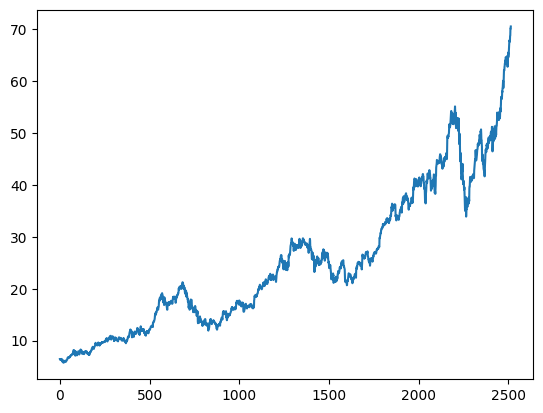

In [6]:
 import matplotlib.pyplot as plt
 plt.plot(df.Close)

In [7]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440331,6.455077,6.391278,6.422877,493729600
1,6.451465,6.487878,6.417459,6.458085,601904800
2,6.348847,6.477046,6.342226,6.451466,552160000
3,6.337110,6.379844,6.291067,6.372320,477131200
4,6.379241,6.379843,6.291368,6.328684,447610800
...,...,...,...,...,...
2510,68.757660,68.818186,67.878820,67.917557,98572000
2511,68.823021,68.973132,68.496186,68.924708,48478800
2512,70.188522,70.205471,68.927160,68.956211,93121200


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.212839
2511,57.410470
2512,57.647438
2513,57.875338


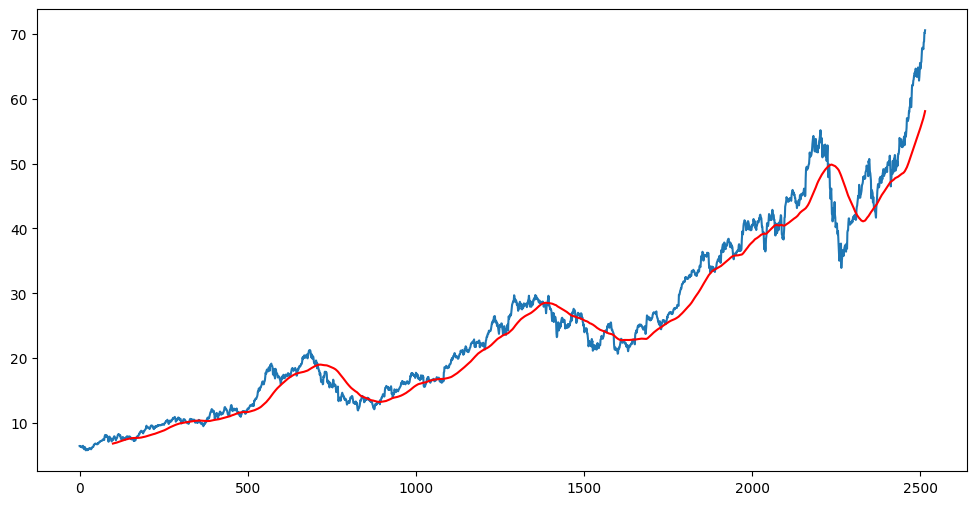

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,52.164465
2511,52.291901
2512,52.425206
2513,52.555959


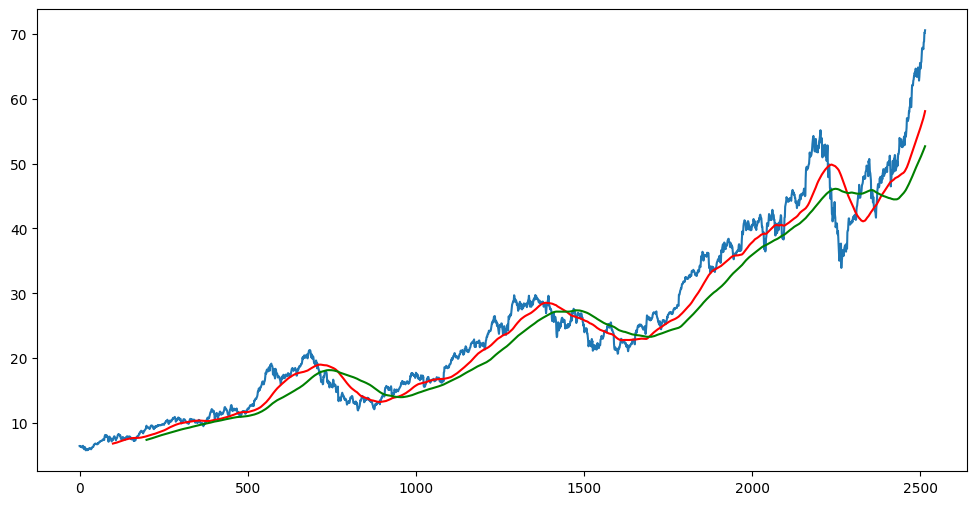

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')


In [14]:
df.shape

(2515, 5)

In [16]:
#splitting data into traing and testing
import pandas as pd
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [18]:
data_training.head()

Ticker,AAPL
0,6.440331
1,6.451465
2,6.348847
3,6.337110
4,6.379241


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02760002],
       [0.02806501],
       [0.02377927],
       ...,
       [0.88408387],
       [0.89123172],
       [0.88640226]])

In [21]:
data_training_array.shape

(1760, 1)

In [27]:
import numpy as np
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#ML model

In [33]:
!pip install keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
          input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences=True,))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences=True,))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu',))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 46s 273ms/step - loss: 0.0048
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 273ms/step - loss: 0.0048
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 270ms/step - loss: 0.0043
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 273ms/step - loss: 0.0036
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 267ms/step - loss: 0.0038
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 267ms/step - loss: 0.0041
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 267ms/step - loss: 0.0042
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 267ms/step - loss: 0.0036
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 275ms/step - loss: 0.0043
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 270ms/step - loss: 0.0035
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - loss: 0.0031
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 292ms/step - loss: 0.0032
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 284ms/step - loss: 0.0033
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 279ms/step - loss: 0.0035
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [40]:
model.save('keras_model.h5')

In [41]:
import os
print(os.listdir("/content"))


['.config', 'keras_model.h5', 'sample_data']


In [43]:
!find /content -name "*.ipynb"


In [44]:
data_testing.head()

Ticker,AAPL
1760,26.996561
1761,26.786110
1762,26.862427
1763,26.832365
1764,26.968813


In [45]:
data_training.tail(100)

Ticker,AAPL
1660,24.935099
1661,25.036335
1662,24.849962
1663,24.833853
1664,24.891375
...,...
1755,27.072887
1756,26.894806
1757,26.947992
1758,27.119141


In [ ]:
past_100_days = data_training.tail(100)

In [48]:
past_100_days = data_training.tail(100)

import pandas as pd
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()


Ticker,AAPL
0,24.935099
1,25.036335
2,24.849962
3,24.833853
4,24.891375


In [49]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02573557],
       [0.02789648],
       [0.02391831],
       [0.02357445],
       [0.02480227],
       [0.03118709],
       [0.03069598],
       [0.02991014],
       [0.02922258],
       [0.03059774],
       [0.02642313],
       [0.02809292],
       [0.02406561],
       [0.02180638],
       [0.01871225],
       [0.01812289],
       [0.0140955 ],
       [0.01458662],
       [0.01768075],
       [0.02259222],
       [0.02244484],
       [0.02568643],
       [0.01173815],
       [0.        ],
       [0.01134511],
       [0.02367265],
       [0.04243425],
       [0.06109739],
       [0.05790502],
       [0.05132368],
       [0.05127462],
       [0.05117642],
       [0.0564315 ],
       [0.04705079],
       [0.04788581],
       [0.04891715],
       [0.05314081],
       [0.0444479 ],
       [0.04872075],
       [0.04611773],
       [0.04847509],
       [0.04872075],
       [0.05284617],
       [0.05368111],
       [0.06345483],
       [0.06468277],
       [0.06979055],
       [0.068

In [50]:
input_data.shape

(855, 1)

In [60]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i -100: i])
    y_test.append(input_data[i, -10: i])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755, 1)


In [61]:
#marking predictions

y_predicted = model.predict(x_test)
y_predicted.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step


(755, 1)

In [63]:
y_test

array([[0.06973795],
       [0.06524582],
       [0.06687482],
       [0.06623315],
       [0.06914566],
       [0.0755633 ],
       [0.08089468],
       [0.08148717],
       [0.08464644],
       [0.08217815],
       [0.08114156],
       [0.08588049],
       [0.08583127],
       [0.08479464],
       [0.08588049],
       [0.08627561],
       [0.08573254],
       [0.09516142],
       [0.09545764],
       [0.0955069 ],
       [0.09392733],
       [0.09254505],
       [0.12907561],
       [0.1279898 ],
       [0.1307049 ],
       [0.13667824],
       [0.14279945],
       [0.14531696],
       [0.15002719],
       [0.14853987],
       [0.15434075],
       [0.162918  ],
       [0.16534733],
       [0.16455437],
       [0.16638864],
       [0.17124775],
       [0.17328021],
       [0.17040447],
       [0.17104919],
       [0.17238791],
       [0.17268536],
       [0.18656757],
       [0.18245256],
       [0.18651773],
       [0.18433683],
       [0.18522901],
       [0.18265091],
       [0.181

In [64]:
y_predicted

array([[0.12666073],
       [0.12772748],
       [0.12865523],
       [0.12940818],
       [0.12997356],
       [0.13035432],
       [0.13058001],
       [0.13070944],
       [0.13081434],
       [0.13095829],
       [0.1311957 ],
       [0.13154998],
       [0.13202563],
       [0.1326234 ],
       [0.13332579],
       [0.13410184],
       [0.13491765],
       [0.13573739],
       [0.13653803],
       [0.13732746],
       [0.13811302],
       [0.13889852],
       [0.13967717],
       [0.14049593],
       [0.14149427],
       [0.14278159],
       [0.14445177],
       [0.14657941],
       [0.14920819],
       [0.15234041],
       [0.15592435],
       [0.15987125],
       [0.16409633],
       [0.16851884],
       [0.17305171],
       [0.17760998],
       [0.18212745],
       [0.18655255],
       [0.19080618],
       [0.19484201],
       [0.19863307],
       [0.20216013],
       [0.20544283],
       [0.20850231],
       [0.21136391],
       [0.21404317],
       [0.21654858],
       [0.218

In [65]:
scaler.scale_

array([0.02134523])

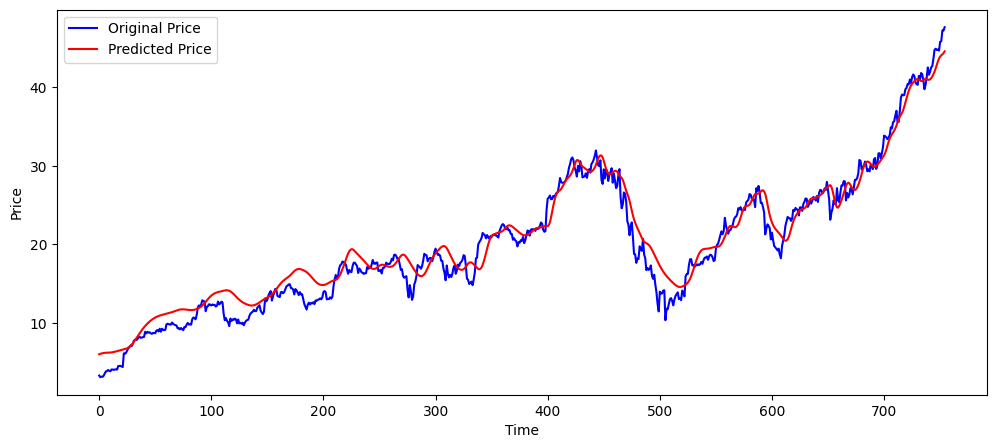

In [67]:
y_test_scaled = y_test * scale_factor

plt.figure(figsize=(12,5))
plt.plot(y_test_scaled, 'b', label='Original Price')  # Scaled original price
plt.plot(y_predicted, 'r', label='Predicted Price')   # Already scaled predicted price
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()